# End_to_End Project using logistic, SVM, Naive_bayes, Desicion_Tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


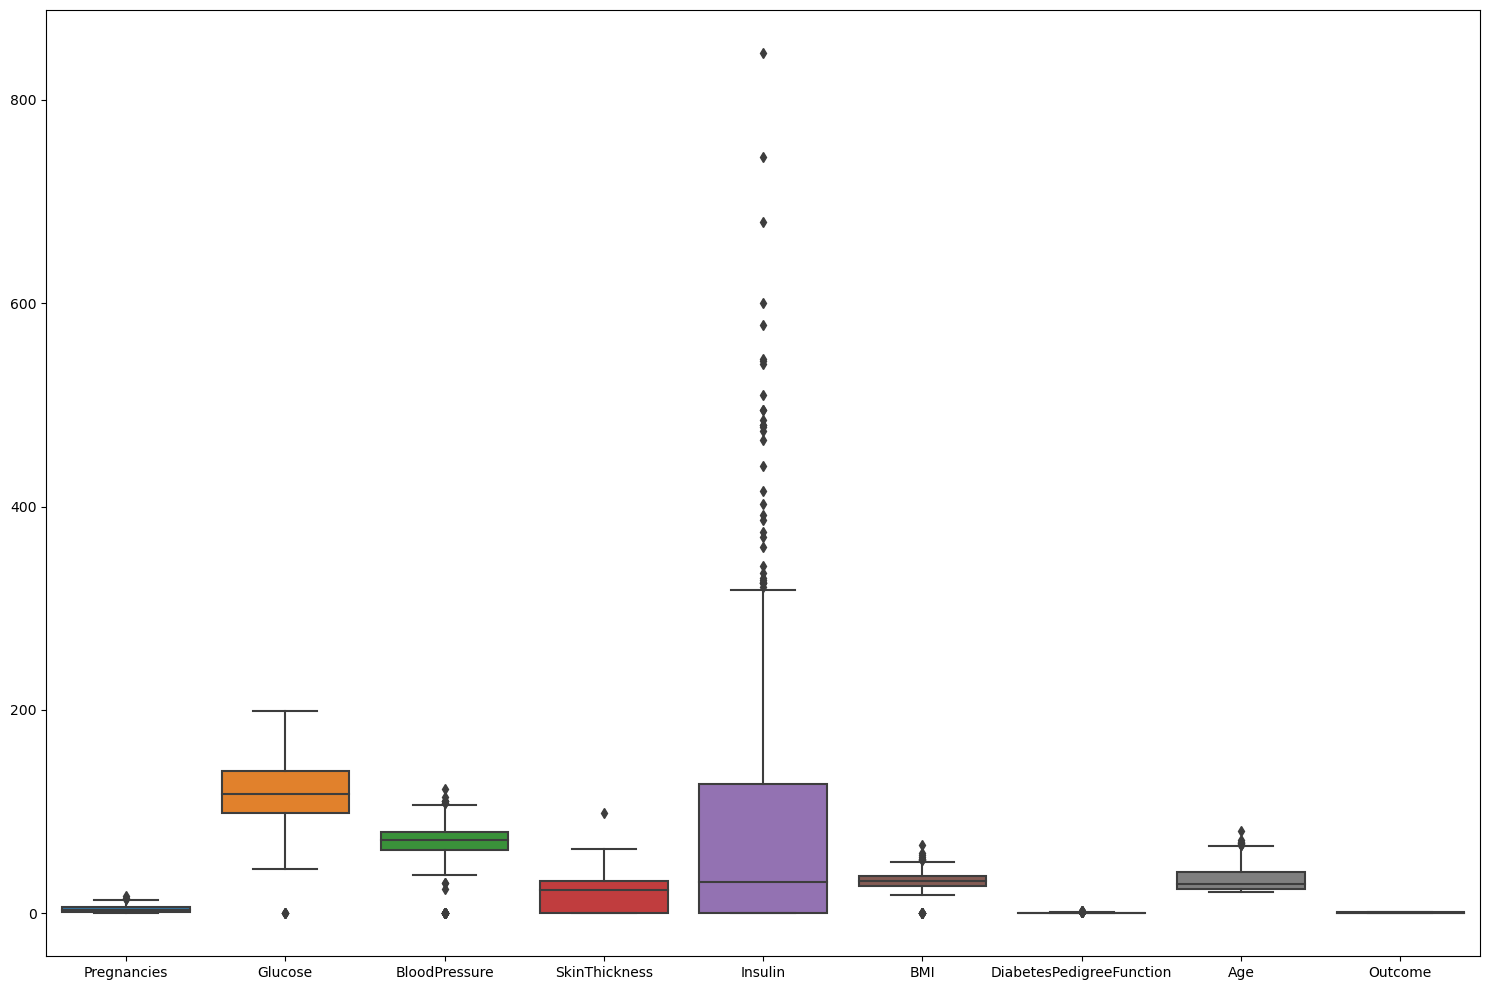

In [9]:
fig = plt.subplots(figsize = (15,10))
sns.boxplot(data=df)
plt.tight_layout()

In [10]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean()) 
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())		

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# independent and dependent variable
X = df.drop(labels='Outcome',axis=1)
y = df.Outcome

In [13]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.0,43.1,2.288,33


In [14]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((514, 8), (254, 8), (514,), (254,))

In [17]:
import pickle
def Standard_Scalar(X_train,X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Make Pickle file
    file = open('Standard_Scaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled,X_test_scaled

In [18]:
X_train_scaled,X_test_scaled = Standard_Scalar(X_train,X_test)

In [19]:
X_train_scaled

array([[ 1.89917664, -0.23733894,  2.11586747, ..., -1.19084557,
         1.60661512,  0.06905859],
       [ 0.98286551,  0.64818885, -1.02542201, ..., -0.50058836,
         0.62609815,  2.37289284],
       [ 0.06655438, -0.20454161, -0.03343586, ..., -1.46407238,
        -0.02953111,  0.32504017],
       ...,
       [ 1.89917664, -0.6965015 ,  1.12388132, ...,  1.91531186,
         1.94028358,  0.41036736],
       [-1.1551938 ,  0.61539153, -0.27271377, ...,  1.45514039,
        -0.78467552, -0.35757739],
       [-1.1551938 ,  0.09063432,  1.95053644, ..., -1.40655095,
        -0.61784129, -1.04019494]])

In [20]:
X_test_scaled

array([[ 0.67742846, -0.79489347, -1.19075303, ...,  0.24719028,
        -0.12611934,  0.83700334],
       [-0.54431971, -0.33573092,  0.21456068, ...,  0.49165637,
        -0.95150975, -1.04019494],
       [-0.54431971, -0.46692022, -0.69475996, ..., -0.21298119,
        -0.92224058, -1.04019494],
       ...,
       [-0.84975676, -0.04401408,  0.13189517, ..., -0.65877231,
        -0.50954538, -1.04019494],
       [ 1.28830255,  0.68098618, -0.52942893, ...,  0.37661351,
        -1.00712116,  0.66634895],
       [-0.54431971, -0.6965015 , -1.19075303, ..., -1.16208485,
         0.41243326, -0.86954055]])

# Perfoming Logistic Regression using Hyperparameter tunning

In [21]:
logclassifier = LogisticRegression()
logclassifier.fit(X_train_scaled,y_train)

LogisticRegression()

# Performing Decision Tree using Hyperparameter tunning

In [22]:
Dtclassifier = DecisionTreeClassifier()
Dtclassifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

# Performing SVM using Hypermeter tunning

In [23]:
svcclassifier = SVC()
svcclassifier.fit(X_train_scaled,y_train)

SVC()

# Performing Naive Baye's with BernuolliNB using Hypermeter tunning

In [24]:
bnb = BernoulliNB()
bnb.fit(X_train_scaled,y_train)

BernoulliNB()

In [25]:
# Hyperparameter tunning for Logistic regression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
parameter = {
    'penalty' : ['l1','l2','elasticnet',None],
    'C' : [1.0,0.1,0.01],
    'solver' : ['lbfgs','liblinear','newton-cg']
}

In [26]:
# Hyperparameter tunning for Decision tree
parameter_dt = {
    'criterion' :['gini','entropy','log_loss'],
    'max_depth' : [10,20,30,40,50,60],
    'min_samples_split' : [2,3,4,8,10]
}

In [27]:
# Hyperparameter tunning for SVM
parameter_svm = {
    'C' : [1.0,0.001,0.01],
    'kernel' : ['linear','poly','rbf','sigmoid'],
    'gamma' : ['scale','auto']
}

In [28]:
# Hyperparameter tunning for naive bayes using bernoulliNB
parameter_bnb = {
    'alpha' : [1.0,0.1,0.01,0.001],
    'force_alpha' : [True,False],
    'binarize' : [0.0,0.001,None]
}

In [29]:
logclf = GridSearchCV(logclassifier,param_grid=parameter,cv=5,scoring='accuracy',verbose=3)
logclf.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.845 total time=   0.0s
[CV 2/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.718 total time=   0.0s
[CV 3/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.816 total time=   0.0s
[CV 4/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.718 total time=   0.0s
[CV 5/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.745 total time=   0.0s
[CV 1/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .C=1.0, penalty=l1, solver=ne

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='accuracy', verbose=3)

In [30]:
dtclf = GridSearchCV(Dtclassifier,param_grid=parameter_dt,cv=5,scoring='accuracy',verbose=3)
dtclf.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=10, min_samples_split=2;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_split=2;, score=0.699 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_split=2;, score=0.738 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_split=2;, score=0.767 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_split=2;, score=0.657 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_split=3;, score=0.728 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_split=3;, score=0.709 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_split=3;, score=0.709 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_split=3;, score=0.767 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_split=3;, score=0.6

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, 40, 50, 60],
                         'min_samples_split': [2, 3, 4, 8, 10]},
             scoring='accuracy', verbose=3)

In [31]:
svmclf = GridSearchCV(svcclassifier,param_grid=parameter_svm,cv=5,scoring='accuracy',verbose=3)
svmclf.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .C=1.0, gamma=scale, kernel=linear;, score=0.845 total time=   0.0s
[CV 2/5] END .C=1.0, gamma=scale, kernel=linear;, score=0.709 total time=   0.0s
[CV 3/5] END .C=1.0, gamma=scale, kernel=linear;, score=0.816 total time=   0.0s
[CV 4/5] END .C=1.0, gamma=scale, kernel=linear;, score=0.738 total time=   0.0s
[CV 5/5] END .C=1.0, gamma=scale, kernel=linear;, score=0.755 total time=   0.0s
[CV 1/5] END ...C=1.0, gamma=scale, kernel=poly;, score=0.786 total time=   0.0s
[CV 2/5] END ...C=1.0, gamma=scale, kernel=poly;, score=0.699 total time=   0.0s
[CV 3/5] END ...C=1.0, gamma=scale, kernel=poly;, score=0.738 total time=   0.0s
[CV 4/5] END ...C=1.0, gamma=scale, kernel=poly;, score=0.689 total time=   0.0s
[CV 5/5] END ...C=1.0, gamma=scale, kernel=poly;, score=0.745 total time=   0.0s
[CV 1/5] END ....C=1.0, gamma=scale, kernel=rbf;, score=0.825 total time=   0.0s
[CV 2/5] END ....C=1.0, gamma=scale, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 0.001, 0.01], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [32]:
bnbclf = GridSearchCV(bnb,param_grid=parameter_bnb,cv=5,scoring='accuracy',verbose=3)
bnbclf.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END alpha=1.0, binarize=0.0, force_alpha=True;, score=0.806 total time=   0.0s
[CV 2/5] END alpha=1.0, binarize=0.0, force_alpha=True;, score=0.670 total time=   0.0s
[CV 3/5] END alpha=1.0, binarize=0.0, force_alpha=True;, score=0.777 total time=   0.0s
[CV 4/5] END alpha=1.0, binarize=0.0, force_alpha=True;, score=0.718 total time=   0.0s
[CV 5/5] END alpha=1.0, binarize=0.0, force_alpha=True;, score=0.696 total time=   0.0s
[CV 1/5] END alpha=1.0, binarize=0.0, force_alpha=False;, score=0.806 total time=   0.0s
[CV 2/5] END alpha=1.0, binarize=0.0, force_alpha=False;, score=0.670 total time=   0.0s
[CV 3/5] END alpha=1.0, binarize=0.0, force_alpha=False;, score=0.777 total time=   0.0s
[CV 4/5] END alpha=1.0, binarize=0.0, force_alpha=False;, score=0.718 total time=   0.0s
[CV 5/5] END alpha=1.0, binarize=0.0, force_alpha=False;, score=0.696 total time=   0.0s
[CV 1/5] END alpha=1.0, binarize=0.001, force_alpha=T

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001],
                         'binarize': [0.0, 0.001, None],
                         'force_alpha': [True, False]},
             scoring='accuracy', verbose=3)

In [33]:
logclf.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [34]:
dtclf.best_params_

{'criterion': 'log_loss', 'max_depth': 50, 'min_samples_split': 4}

In [35]:
svmclf.best_params_

{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

In [36]:
bnbclf.best_params_

{'alpha': 1.0, 'binarize': 0.0, 'force_alpha': True}

In [37]:
lgclassifier = LogisticRegression(C=0.1, penalty='l2', solver='lbfgs')

In [38]:
lgclassifier.fit(X_train_scaled,y_train)

LogisticRegression(C=0.1)

In [39]:
dtreeclassifier = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=3)
dtreeclassifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3)

In [40]:
svmclassifier = SVC(C=0.01,gamma='scale',kernel='linear')
svmclassifier.fit(X_train_scaled,y_train)

SVC(C=0.01, kernel='linear')

In [41]:
bnbclassifier = BernoulliNB(alpha=1.0,binarize=0.0,force_alpha=True)
bnbclassifier.fit(X_train_scaled,y_train)

BernoulliNB(force_alpha=True)

In [42]:
y_pred = lgclassifier.predict(X_test_scaled)

In [43]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [44]:
y_pred_tree = dtreeclassifier.predict(X_test_scaled)
y_pred_tree

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [45]:
y_pred_svm = svmclassifier.predict(X_test_scaled)
y_pred_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [46]:
y_pred_bnb = bnbclassifier.predict(X_test_scaled)
y_pred_bnb

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [47]:
accuracy_score(y_test,y_pred)

0.7559055118110236

In [48]:
# Decision Tree
accuracy_score(y_test,y_pred_tree)

0.7165354330708661

In [49]:
# SVM
accuracy_score(y_test,y_pred_svm)

0.7480314960629921

In [50]:
# Naive bayes
accuracy_score(y_test,y_pred_bnb)

0.6850393700787402

In [51]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[143,  25],
       [ 37,  49]])

In [52]:
conf_mat_dt = confusion_matrix(y_test,y_pred_tree)
conf_mat_dt

array([[128,  40],
       [ 32,  54]])

In [53]:
conf_mat_svm = confusion_matrix(y_test,y_pred_svm)
conf_mat_svm

array([[145,  23],
       [ 41,  45]])

In [54]:
conf_mat_bnb = confusion_matrix(y_test,y_pred_bnb)
conf_mat_bnb

array([[124,  44],
       [ 36,  50]])

In [55]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [56]:
true_positive_dt = conf_mat_dt[0][0]
false_positive_dt = conf_mat_dt[0][1]
false_negative_dt = conf_mat_dt[1][0]
true_negative_dt = conf_mat_dt[1][1]

In [57]:
true_positive_svm = conf_mat_svm[0][0]
false_positive_svm = conf_mat_svm[0][1]
false_negative_svm = conf_mat_svm[1][0]
true_negative_svm = conf_mat_svm[1][1]

In [58]:
true_positive_bnb = conf_mat_bnb[0][0]
false_positive_bnb = conf_mat_bnb[0][1]
false_negative_bnb = conf_mat_bnb[1][0]
true_negative_bnb = conf_mat_bnb[1][1]

In [59]:
# Model Accuracy
accuracy = (true_positive + true_negative)/(true_positive + false_positive + false_negative + true_negative)
accuracy

0.7559055118110236

In [60]:
# Decision tree
accuracy_dt = (true_positive_dt + true_negative_dt)/(true_positive_dt + false_positive_dt + false_negative_dt + true_negative_dt)
accuracy_dt

0.7165354330708661

In [61]:
# SVM
accuracy_svm = (true_positive_svm + true_negative_svm)/(true_positive_svm + false_positive_svm + false_negative_svm + true_negative_svm)
accuracy_svm

0.7480314960629921

In [62]:
# Naive bayes
accuracy_bnb = (true_positive_bnb + true_negative_bnb)/(true_positive_bnb + false_positive_bnb + false_negative_bnb + true_negative_bnb)
accuracy_bnb

0.6850393700787402

In [63]:
# Precision
precision = true_positive/(true_positive + false_positive)
precision

0.8511904761904762

In [64]:
precision_dt = true_positive_dt/(true_positive_dt + false_positive_dt)
precision_dt

0.7619047619047619

In [65]:
precision_svm = true_positive_svm/(true_positive_svm + false_positive_svm)
precision_svm

0.8630952380952381

In [66]:
precision_bnb = true_positive_bnb/(true_positive_bnb + false_positive_bnb)
precision_bnb

0.7380952380952381

In [67]:
# Recall
recall = true_positive/(true_positive + false_negative)
recall

0.7944444444444444

In [68]:
recall_dt = true_positive_dt/(true_positive_dt + false_negative_dt)
recall_dt

0.8

In [69]:
recall_svm = true_positive_svm/(true_positive_svm + false_negative_svm)
recall_svm

0.7795698924731183

In [70]:
recall_bnb = true_positive_bnb/(true_positive_bnb + false_negative_bnb)
recall_bnb

0.775

In [71]:
# F1 Score
f1_score = 2 * (precision * recall)/(precision + recall)
f1_score

0.82183908045977

In [72]:
f1_score_dt = 2 * (precision_dt * recall_dt)/(precision_dt + recall_dt)
f1_score_dt

0.7804878048780488

In [73]:
f1_score_svm = 2 * (precision_svm * recall_svm)/(precision_svm + recall_svm)
f1_score_svm

0.8192090395480226

In [74]:
f1_score_bnb = 2 * (precision_bnb * recall_bnb)/(precision_bnb + recall_bnb)
f1_score_bnb

0.7560975609756099

In [76]:
file = open('SVM.pkl','wb')
pickle.dump(svmclassifier,file)
file.close()